<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Meta-analise/PythonMeta_Seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação e importação dos pacotes

In [1]:
!pip install PythonMeta --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 3.5 MB/s eta 0:00:00


In [2]:
import PythonMeta as PMA
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Forest Plot

In [4]:
d = PMA.Data()
m = PMA.Meta()
f = PMA.Fig()

d.datatype = "CATE"  # desfecho binário (ex: resposta / não resposta) ou "CONT" para desfecho contínuo
studies = d.getdata(d.readfile("/content/ Haloperidol.txt"))

m.datatype = d.datatype
m.models = "Random"        # Random ou Fixed
m.algorithm = "MH"         # Mantel-Haenszel ("MH"),"Peto", Inverse variance ("IV"), (DEFAULT) ("IV-Heg"), "IV-Cnd", "IV-Gls"
m.effect = "RR"            # Risk Ratio ("RR"), Odds Ratio ("OR"), Risk Difference ("RD"), Weighted Mean Diff ("MD"), Standard Mean Diff ("SMD")

results = m.meta(studies)

In [5]:
results

[['RR',
  2.281469280579475,
  25.231569839130675,
  1.5443801745461103,
  3.3703502311259563,
  818,
  0.19908010632222928,
  35.176355523133545,
  '0.004',
  54.51490138176002,
  4.143154592191358,
  '0.000',
  0.2488541373706524],
 ['Arvanitis1997',
  1.4166666666666665,
  3.2808199841713788,
  0.891101114284821,
  2.252207311013381,
  101,
  0.23653268784314074],
 ['Beasley1996',
  1.048936170212766,
  3.5379627850777453,
  0.7315898219693302,
  1.5039398528247299,
  81,
  0.18383252750839948],
 ['Bechelli1983',
  6.206896551724138,
  1.3082645789738745,
  1.5195135424788664,
  25.35388051952212,
  59,
  0.7179952934242051],
 ['Borison1992',
  6.999999999999999,
  0.4200405956297212,
  0.4001683985031327,
  122.44844966091546,
  24,
  1.4600918230947433],
 ['Chouinard1993',
  3.492063492063492,
  1.6974646803811935,
  1.1131454983829392,
  10.954998650506669,
  43,
  0.583317872398695],
 ['Durost1964',
  8.68421052631579,
  0.8193598457989559,
  1.2580063125615693,
  59.94843723145

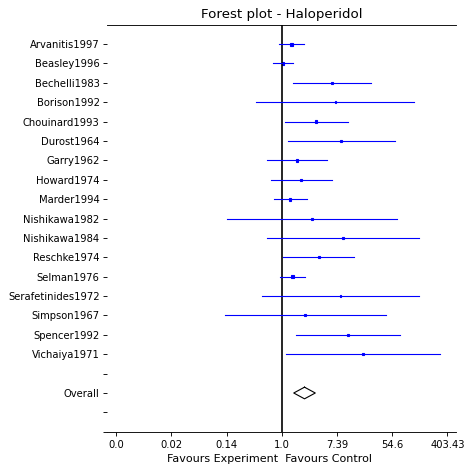

In [6]:
# Forest plot

f.forest(results)
plt.title("Forest plot - Haloperidol")
plt.show()

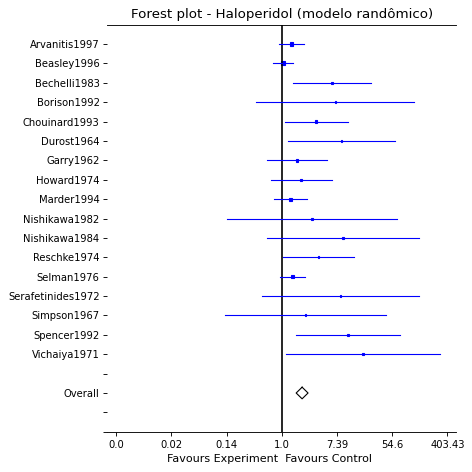

In [7]:
# Modelo fixo
m.models = "Fixed"
res_fixed = m.meta(studies)

# Forest do modelo fixo
f.forest(res_fixed)
plt.title("Forest plot - Haloperidol (modelo randômico)")
plt.show()

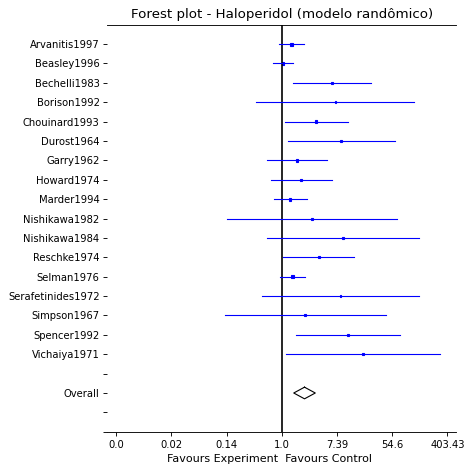

In [8]:
# Modelo randômico
m.models = "Random"
res_random = m.meta(studies)

# Forest do modelo fixo
f.forest(res_random)
plt.title("Forest plot - Haloperidol (modelo randômico)")
plt.show()

#Funnel plot

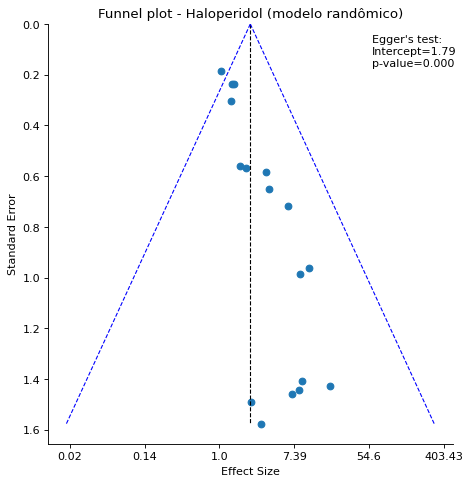

In [9]:
# Funnel

f.funnel(results)
plt.title("Funnel plot - Haloperidol (modelo randômico)")
plt.show()

# Egger's Test

In [10]:
# Descobrindo o Teste de Egger

print(m.Eggers_test(results)) #Intercept, t-value, p-value, SD  and CI

(np.float64(1.7894443218882543), np.float64(6.949936131508295), array(4.65397645e-06), np.float64(0.2574763692828216), array([1.24064643, 2.33824221]))


In [11]:
def standardized_effect(results):
    """
    Calcula o SND (standard normal deviate) de cada estudo:
    SND = log(RR) / SE_logRR
    """
    snd = []
    for i in range(1, len(results)):
        rr = results[i][1]
        se = results[i][6]      # SE do log(RR)
        snd_i = math.log(rr) / se
        snd.append(snd_i)
    return np.array(snd)

def precision(results):
    """
    Precisão = 1 / SE
    """
    prec = []
    for i in range(1, len(results)):
        se = results[i][6]
        prec.append(1 / se)
    return np.array(prec)

In [12]:
# 1) Vetores x e y
y = standardized_effect(results)   # SND
x = precision(results)             # 1/SE

# 2) Adiciona intercepto na regressão
x_with_const = sm.add_constant(x)  # primeira coluna = 1 (intercepto)

# 3) Ajusta regressão linear SND ~ 1/SE
egger_model = sm.OLS(y, x_with_const).fit()

print(egger_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.801
Date:                Wed, 26 Nov 2025   Prob (F-statistic):              0.200
Time:                        19:45:05   Log-Likelihood:                -15.906
No. Observations:                  17   AIC:                             35.81
Df Residuals:                      15   BIC:                             37.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7894      0.257      6.950      0.0